**Análisis de los deportes en Juegos Olímpicos de Invierno**

Declaraciones de librerías.

In [1]:
import numpy as np  # muy útil para cálculos científicos con Python
import pandas as pd # Librería para estructar datos primarios

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec

Lectura de los datos.

In [2]:
athletes = pd.read_csv("athlete_events_dataset.csv") #pd.read_csv("athlete_events_dataset.csv")
regions = pd.read_csv("country_definitions.csv")     #pd.read_csv("noc_regions.csv") 
medal_2018 = pd.read_csv("pyeongchang_medal_2018.csv")

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Union de los dataframes.

In [3]:
df_athletes = athletes.merge(regions, how='left', on='NOC')
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Renombrado de las columnas.

In [4]:
df_athletes.rename(columns={'region':'Country','notes':'Notes'}, inplace=True)
df_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Busqueda de valores nulos

In [5]:
missing_data = df_athletes.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    271116
Name: ID, dtype: int64

Name
False    271116
Name: Name, dtype: int64

Sex
False    271116
Name: Sex, dtype: int64

Age
False    261642
True       9474
Name: Age, dtype: int64

Height
False    210945
True      60171
Name: Height, dtype: int64

Weight
False    208241
True      62875
Name: Weight, dtype: int64

Team
False    271116
Name: Team, dtype: int64

NOC
False    271116
Name: NOC, dtype: int64

Games
False    271116
Name: Games, dtype: int64

Year
False    271116
Name: Year, dtype: int64

Season
False    271116
Name: Season, dtype: int64

City
False    271116
Name: City, dtype: int64

Sport
False    271116
Name: Sport, dtype: int64

Event
False    271116
Name: Event, dtype: int64

Medal
True     231333
False     39783
Name: Medal, dtype: int64

Country
False    271114
True          2
Name: Country, dtype: int64

Notes
True     266077
False      5039
Name: Notes, dtype: int64



Con base en el resumen de arriba, cada columna tiene 27116 filas de datos, cinco columnas contienen información faltante:

<ol>
    <li>"Age": 9474 datos faltantes</li>
    <li>"Height": 60171 datos faltantes</li>
    <li>"Weight": 62875 datos faltantes</li>
    <li>"Country" : 2 datos faltantes</li>
    <li>"Notes": 5039 datos faltantes</li>
</ol>

Los datos faltantes de Edad, Peso y Altura, se sustituirán por la media de los mismos. Por su parte hay que revisar los datos de Country y Notes para determinar si amerita una sustitución.

In [6]:
avg_age_loss = df_athletes["Age"].astype("float").mean(axis=0)
print("Average of Age:", avg_age_loss)

df_athletes["Age"].replace(np.nan, avg_age_loss, inplace=True)

Average of Age: 25.556898357297374


In [7]:
avg_height_loss = df_athletes["Height"].astype("float").mean(axis=0)
print("Average of Height:", avg_height_loss)

df_athletes["Height"].replace(np.nan, avg_height_loss, inplace=True)

Average of Height: 175.33896987366376


In [8]:
avg_weight_loss = df_athletes["Weight"].astype("float").mean(axis=0)
print("Average of Weight:", avg_weight_loss)

df_athletes["Weight"].replace(np.nan, avg_weight_loss, inplace=True)

Average of Weight: 70.70239290053351


Se crea el dataset, el cual se usará para los Juegos de Invierno.

In [9]:
df_winter = df_athletes[athletes['Season']=='Winter']
df_winter.head(2)
df = df_winter.copy()

Lista de deportes que forman el programa olímpico.

In [10]:
winter_sport = df[df.Season=='Winter'].Sport.unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

Función usada para listar los eventos de los deportes de invierno.

In [11]:
def olympic_event_sport(sport):
    oly = df.loc[df['Sport']==sport] #Países con Medallas
    oly_eve = oly['Event'].unique() #Eventos del deporte en cuestión

    return oly_eve

In [12]:
olympic_event_sport('Luge') #Colocar el deporte a visualizar

array(["Luge Women's Singles", "Luge Men's Singles",
       "Luge Mixed (Men)'s Doubles", 'Luge Mixed Team Relay'],
      dtype=object)

Listado de TODOS los eventos olímpicos de invierno

In [13]:
df_winter['Event'].unique()

array(["Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Ice Hockey Men's Ice Hockey",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Alpine Skiing Men's Downhill", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom", "Alpine Skiing Men's Slalom",
       "Alpine Skiing Men's Combined", "Speed Skating Men's 500 metres",
       "Speed Skating Men's 1,500 metres", "Luge Women's Singles",
       "Bobsleigh Men's Four", "Speed Skating Men's 5,000 metres",
       "Speed Skating Men's 10,000 metres",
       "Cross Country Skiing Men's 15 kilometres",
       "Alpine Skiing Women's Slalom", "Figure Skating Men's Singles",
       'Figure Skating Mixed Team

En este punto, se renombran los eventos sin distinción de gnénero (salvo algunos deportes) y eliminando detalles concretos. A fin de generalizar los mismos.

In [14]:
'''
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s 1,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 4 x 10 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Ice Hockey Men\'s Ice Hockey','Men')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 30 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 7.5 kilometres Sprint','Sprint')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men\'s Slalom','Slalom') 
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men\'s Combined','Combined')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men\'s Super G','Super G') 
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s 1,500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Luge Women\'s Singles',' Women Singles') 
df_winter['Event'] = df_winter['Event'].str.replace('Bobsleigh Men\'s Four','Four Men')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s 5,000 metres','Individual')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s 10,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 50 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men\'s Giant Slalom','Giant Slalom') 
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Women\'s Slalom','Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Figure Skating Men\'s Singles','Men Singles') 
df_winter['Event'] = df_winter['Event'].str.replace('Figure Skating Mixed Team','Mixed team')
df_winter['Event'] = df_winter['Event'].str.replace('Nordic Combined Men\'s Individual','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Men\'s 4 x 7.5 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Men\'s Moguls','Moguls') 
df_winter['Event'] = df_winter['Event'].str.replace('Figure Skating Mixed Pairs','Mixed Pairs')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Men\'s Aerials','Aerials')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Women\'s Giant Slalom','Giant Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 20 kilometres','Individual')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s Team Pursuit (6 laps)','Team Pursuit')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s 1,500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 15 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Figure Skating Women\'s Singles','Women Singles')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s 1,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 5 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 3 x 5 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Nordic Combined Men\'s Sprint','Sprint') 
df_winter['Event'] = df_winter['Event'].str.replace('Bobsleigh Men\'s Two','Two Men')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Women\'s Combined','Combined')
df_winter['Event'] = df_winter['Event'].str.replace('Ski Jumping Men\'s Normal Hill, Individual','Normal Hill Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Ice Hockey Women\'s Ice Hockey','Women') 
df_winter['Event'] = df_winter['Event'].str.replace('Curling Men\'s Curling','Men')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 3 x 7.5 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 4 x 7.5 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Curling Women\'s Curling','Women')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 10 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Men\'s Slopestyle','Slopestyle')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Women\'s Halfpipe','Halfpipe')
df_winter['Event'] = df_winter['Event'].str.replace('Figure Skating Mixed Ice Dancing','Mixed Ice Dancing') 
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Men\'s 20 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 15 km Skiathlon','Skiathlon')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Halfpipe','Halfpipe')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 10/15 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Ski Jumping Men\'s Large Hill, Team','Large Hill Team')
df_winter['Event'] = df_winter['Event'].str.replace('Ski Jumping Men\'s Large Hill, Individual','Harge Hill Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Women\'s Aerials','Aerials')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Men\'s 5,000 metres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 4 x 6 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Skeleton Men\'s Skeleton','Men') 
df_winter['Event'] = df_winter['Event'].str.replace('Luge Men\'s Singles','Sigles')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men\'s Downhill','Downhill') 
df_winter['Event'] = df_winter['Event'].str.replace('Luge Mixed (Men)\'s Doubles','Mixed Men')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s 3,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 4 x 5 kilometres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Skeleton Women\'s Skeleton','Women') 
df_winter['Event'] = df_winter['Event'].str.replace('Bobsleigh Men\'s Four/Five','Four Man') #Four/Five
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 5/10 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Women\'s Super G','Super G')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Women\'s 3,000 metres Relay','Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Women\'s Moguls','Moguls')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Men\'s 500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Ski Jumping Women\'s Normal Hill, Individual','Normal Hill Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s Team Sprint','Team Sprint')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Halfpipe','Halfpipe')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s 500 metres','Individual')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Men\'s 1,500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 15 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Men\'s 10 kilometres Sprint','Sprint')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 18 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Slopestyle','Slopestyle')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Giant Slalom','Giant Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Parallel Giant Slalom','Parallel Giant Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Boardercross','Boardercross')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Parallel Slalom','Parallel Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s Team Sprint','Team Sprint')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 30 km Skiathlon','Skiathlon')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s Team Pursuit (8 laps)','Team Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s Sprint','Sprint')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s Sprint','Sprint')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women\'s 5,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 10/10 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Boardercross','Boardercross') 
df_winter['Event'] = df_winter['Event'].str.replace('Luge Mixed Team Relay','Mixed Team Relay')
df_winter['Event'] = df_winter['Event'].str.replace('Bobsleigh Women\'s Two','Two Women') 
df_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Women\'s Downhill','Downhill')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s 500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 5/5 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Women\'s Slopestyle','Slopestyle')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Women\'s 500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Women\'s Ski Cross','Ski Cross')
#df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Men\'s Ski Cross','Ski Cross')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Men\'s 1,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Nordic Combined Men\'s Team','Team') 
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Giant Slalom','Giant Slalom')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Women\'s 1,500 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Men\'s Slopestyle','Slopestyle')
df_winter['Event'] = df_winter['Event'].str.replace('Nordic Combined Men\'s Large Hill / 10 km, Individual','Large Hill Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Military Ski Patrol Men\'s Military Ski Patrol','Military Ski Patrol')
df_winter['Event'] = df_winter['Event'].str.replace('Freestyle Skiing Men\'s Halfpipe','Halfpipe')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 30 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men\'s 10 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Parallel Giant Slalom','Parallel Giant Slalom')
#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men\'s Allround','Allround')
df_winter['Event'] = df_winter['Event'].str.replace('Snowboarding Women\'s Parallel Slalom','Parallel Slalom')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 10 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Women\'s 15 kilometres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Alpinism Mixed Alpinism','Mixed')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women\'s 12.5 kilometres Mass Start','Mass Start')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Mixed 2 x 6 kilometres and 2 x 7.5 kilometres Relay','Relay')
#df_winter['Event'] = df_winter['Event'].str.replace('Short Track Speed Skating Women\'s 1,000 metres','Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Nordic Combined Men\'s Normal Hill / 10 km, Individual','Normal Hill Individual')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Men\'s 12.5 kilometres Pursuit','Pursuit')
df_winter['Event'] = df_winter['Event'].str.replace('Biathlon Men\'s 15 kilometres Mass Start','Mass Start')
'''

"\n#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Women's 1,000 metres','Individual')\ndf_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men's 4 x 10 kilometres Relay','Relay')\ndf_winter['Event'] = df_winter['Event'].str.replace('Ice Hockey Men's Ice Hockey','Men')\ndf_winter['Event'] = df_winter['Event'].str.replace('Cross Country Skiing Men's 30 kilometres','Individual')\ndf_winter['Event'] = df_winter['Event'].str.replace('Biathlon Women's 7.5 kilometres Sprint','Sprint')\ndf_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men's Slalom','Slalom') \ndf_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men's Combined','Combined')\ndf_winter['Event'] = df_winter['Event'].str.replace('Alpine Skiing Men's Super G','Super G') \n#df_winter['Event'] = df_winter['Event'].str.replace('Speed Skating Men's 1,500 metres','Individual')\ndf_winter['Event'] = df_winter['Event'].str.replace('Luge Women's Singles',' Women Sin

Atletas en los Juegos de Verano.

In [15]:
df_summer = df_athletes[athletes['Season']=='Summer']
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


Luego de la separación de los dataframes, se depura los atletas que no ganaron medallas en WOG y SOG.

In [16]:
athletesSummer = df_summer.dropna(subset=['Medal'])
athletesSummer.columns[athletesSummer.nunique() <= 1]

Index(['Season'], dtype='object')

In [17]:
athletesWinter = df_winter.dropna(subset=['Medal'])
athletesWinter.columns[athletesWinter.nunique() <= 1]

Index(['Season', 'Notes'], dtype='object')

Ahora, se procederá a eliminar las medallas duplicadas. Esto aplica principalmente en los deportes de conjunto (Como Hockey sobre Hielo) ya que las medallas se otorgan al país ganador mientras que en el dataset, cada jugador de Hockey (siguiendo con el ejemplo) suma medalla y, a la larga, aumenta artificialmente la cantidad de preseas ganadas en los WOG y SOG.

In [18]:
pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

athletesSummer.duplicated().sum()
athletesWinter.duplicated().sum()

athletesSummer.drop_duplicates(inplace=True)
athletesWinter.drop_duplicates(inplace=True)

pd.get_dummies(athletesSummer['Medal'])
pd.get_dummies(athletesWinter['Medal'])

,Bronze,Gold,Silver
40,1,0,0
60,0,1,0
61,1,0,0
63,0,0,1
64,1,0,0
...,...,...,...
270641,0,1,0
270827,0,0,1
270876,0,1,0
270878,1,0,0


In [19]:
summer = pd.concat([athletesSummer,pd.get_dummies(athletesSummer['Medal'])],axis=1)
#winter.head(2)
winter = pd.concat([athletesWinter,pd.get_dummies(athletesWinter['Medal'])],axis=1)
#summer.head(2)

Dataframe con los atletas que ganaron medalla en invierno.

In [20]:
countMedal_winter = winter.drop_duplicates(subset=['Team','NOC','Country','Games','Year','City','Sport','Event','Medal'])
countMedal_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes,Bronze,Gold,Silver
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,1,0,0
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,0,1,0


Antes de trabajar en la participación de los atletas en WOG, se realiza una depuración de los atletas duplicados en una misma edición de los juegos de invierno. Si tomamos el caso de que un atleta participa en distintos eventos de un mismo deporte (por ejemplo Biatlón), se debe descartar su inclusión en el contador de atletas participantes ya que se estaría, por lo menos, duplicando su participacíon.

In [21]:
hola = df_winter.drop_duplicates(subset=['Name', 'Year'], keep='last')
#hola.info()

#Atletas femeninas en JJOO Invierno
womenOlympics = hola[(hola.Sex=='F') & (hola.Season=='Winter')]

#Dataset medallistas femeninas
womenMedal = winter[(winter.Sex=='F')] #womenMedal = countMedal_winter[(countMedal_winter.Sex=='F')]

#Atletas masculinos en JJOO Invierno
menOlympics = hola[(hola.Sex=='M') & (hola.Season=='Winter')]

#Dataset medallistas masculinos
menMedal = winter[(winter.Sex=='M')] #menMedal = countMedal_winter[(countMedal_winter.Sex=='M')]

En este apartado, se desea mostrar qué países son potencia en los deportes que forman (o formaron) parte de los Juegos Olímpicos de Invierno. Para ello, se agrupan los deportes con la mayor cantidad de medallas ganadas por los países participantes.

In [22]:
data_groupby = countMedal_winter.groupby(['Sport'])
data_groupby.head(10)
selected_sport_country = {}
for key, item in data_groupby:
    selected_df = data_groupby.get_group(key)
    selected_df = selected_df[selected_df['Medal'] != 'None'] # != None
    
    selected_sport_country[key] = selected_df['Country'].value_counts().index[0]
    selected_sport_country[key]

for key in selected_sport_country.keys():
    print(key, '---', selected_sport_country[key])

Alpine Skiing --- Austria
Alpinism --- Great Britain
Biathlon --- Germany
Bobsleigh --- Germany
Cross Country Skiing --- Russia
Curling --- Canada
Figure Skating --- Russia
Freestyle Skiing --- United States of America
Ice Hockey --- Canada
Luge --- Germany
Military Ski Patrol --- Switzerland
Nordic Combined --- Norway
Short Track Speed Skating --- South Korea
Skeleton --- United States of America
Ski Jumping --- Norway
Snowboarding --- United States of America
Speed Skating --- Netherlands


La función top_sport_winter_games muestra el top 5 de países con menjor rendimiento en determinado deporte olímpico. Estos datos son hasta los juegos de Sochi 2014.

In [23]:
def top_sport_winter_games(sport, gender, medal):
    if gender == 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
    if gender != 'Overall' and medal == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Sex'] == gender]
    if gender == 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Medal'] == medal]
    if gender != 'Overall' and medal != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Sport'] == sport]
        selected_df = selected_df[selected_df['Sex'] == gender]
        selected_df = selected_df[selected_df['Medal'] == medal]

    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel("Country",fontfamily='monospace',loc='bottom',color='gray')
    ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')
    
    ax.set_title('Top 5 countries in: '+ sport +', Gender: ' + gender +', Medal: ' + medal, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    sns.countplot(y="Country", data=selected_df, order=counted_df_index, palette=sns.color_palette("mako"))

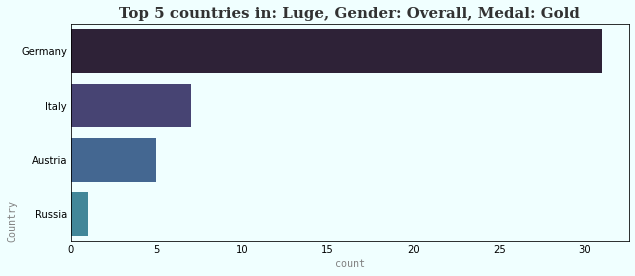

In [24]:
top_sport_winter_games('Luge','Overall','Gold') #Colocar deporte, género: "M", "F", "Overall" y medalla: "Overall", "Gold", "Silver", "Bronze"

La función sport_years grafica el comportamiento de las disciplinas olímpicas a lo largo del tiempo, destacando los 5 países con mejores resultados.

In [25]:
def sport_years(sport):
    selected_df = winter[winter['Sport'] == sport]
    years = selected_df['Year'].sort_values().unique()
    default_medal_df = pd.DataFrame(columns=['Year', 'Medal_Num'])
    default_medal_df['Year'] = years
    default_medal_df['Medal_Num'] = 0
    default_medal_df = default_medal_df.set_index('Year')
    selected_country = selected_sport_country[sport]
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    counted_df_index
    
    fig, ax = plt.subplots(1,1, figsize=(10,4), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel("Total Medals",fontfamily='monospace',loc='bottom',color='gray')
    ax.set_xlabel("")
    
    ax.set_title('Top 5 countries in '+ sport, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
        
    for team in selected_df['Country'].unique():
        temp_df = selected_df[selected_df['Country'] == team]
        temp_df['Medal_Num'] = 1
        temp_group_df = temp_df.groupby(['Year']).sum()
        temp_group_df = temp_group_df.reset_index()
        temp_group_df = temp_group_df[['Year', 'Medal_Num']]
        temp_group_df = temp_group_df.set_index('Year')

        olympics_df = temp_group_df.add(default_medal_df, fill_value=0)
        
        if team == selected_country:
            sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, linewidth=5) #.set_title(sport)
            #plt.axvline(1988, color='r') #Ultimos Juegos URSS
            #plt.axvline(1992, color='g') #Equipo Unificado tras caída URSS
            #plt.axvline(1994, color='b') #Priemros Juegos Rusia
        else:
            sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, alpha=0.7, linewidth=2, markers=True, dashes=False) #.set_title(sport)

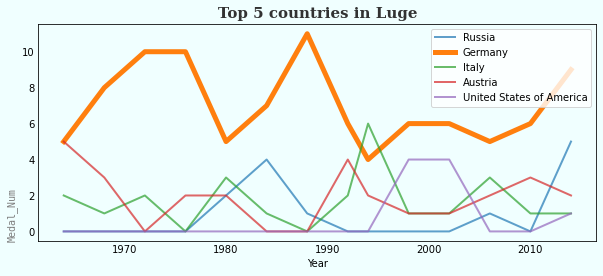

In [26]:
sport_years('Luge') #Colocar deporte

Función que muestra las medallas ganadas por los países en WOG por deporte.

In [27]:
def noc_winter(noc, gender):
    if gender == 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
    if gender != 'Overall':
        selected_df = countMedal_winter[countMedal_winter['Country'] == noc]
        selected_df = selected_df[selected_df['Sex'] == gender]
    
    counted_df_index = selected_df['Country'].value_counts().index[0:5]
    selected_df = selected_df[selected_df['Country'].isin(counted_df_index)]
    
    return selected_df

In [28]:
w = noc_winter('Germany', 'Overall') #´Colocar país y género: "M", "F" "Overall"
winterNOC = w.groupby('Sport').sum()[['Gold','Silver','Bronze']].reset_index() #.sort_values('Gold', ascending=False)
winterNOC['Total'] = winterNOC['Gold'] + winterNOC['Silver'] + winterNOC['Bronze']
winterNOC = winterNOC.sort_values('Gold', ascending=False)  #Se ordena por medallas de Oro ganadas; Gold. Si se quiere graficar el total, ordenar por Total
winterNOC

,Sport,Gold,Silver,Bronze,Total
7,Luge,31,23,21,75
12,Speed Skating,25,28,19,72
1,Biathlon,20,26,15,61
0,Alpine Skiing,17,13,10,40
2,Bobsleigh,16,13,11,40
8,Nordic Combined,8,5,8,21
10,Ski Jumping,8,6,4,18
4,Figure Skating,6,6,9,21
3,Cross Country Skiing,4,10,5,19
11,Snowboarding,1,3,1,5


Luego, se grafica el resultado en forma de torta para enfatizar el %.

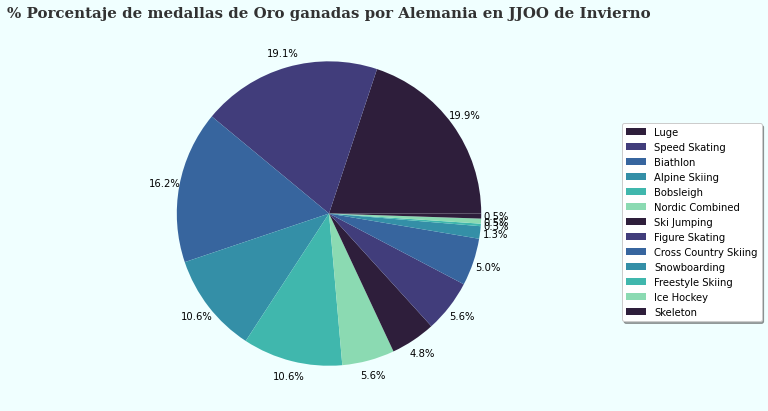

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='azure')
ax.set_facecolor('azure')
ax.set_axisbelow(True)

ax.tick_params(axis=u'both', which=u'both',length=0)
#ax.set_ylabel("NOC",fontfamily='monospace',loc='bottom',color='gray')
#ax.set_xlabel("Total Medals",fontfamily='monospace',loc='center',color='gray')

#Cambiar el país 
ax.set_title('% Porcentaje de medallas de Oro ganadas por Alemania en JJOO de Invierno', fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

#Cambiar Gold por Total para graficar el porcentaje de medallas totales
plt.pie(winterNOC['Total'], colors = sns.color_palette('mako'), autopct='%1.1f%%',pctdistance=1.1)
plt.legend(labels=winterNOC['Sport'], loc='best', bbox_to_anchor=(0.9, 0., 0.75, 0.75), shadow=True) 
plt.show()

Función que grafica la distribución (como dispersión) del peso y altura de los deportistas (y medallistas) de los deportes olímpicos de invierno.

In [30]:
def sport_hw(sport, countMedal_winter, df_winter):
    fig = plt.figure(figsize=(20,7))
    ax0 = fig.add_subplot(1, 2, 1) # añadir sub gráfica 1 (1 fila, 2 columnas, primer gráfica)
    ax0.set_facecolor('azure')
    ax1 = fig.add_subplot(1, 2, 2) # añadir sub gráfica 2 (1 fila, 2 columnas, segunda gráfica)
    ax1.set_facecolor('azure')
    
    df_winter['Medal'].fillna('No Medal', inplace=True)

    ax0.tick_params(axis=u'both', which=u'both',length=0)
    ax0.set_title('Distribución de altura (cm) y peso (kg) de los atletas participantes en ' + sport, fontsize=11,fontweight='bold',fontfamily='serif',color='#323232')
    sport_df_part = df_winter[df_winter['Sport'] == sport]
    sns.scatterplot(sport_df_part['Weight'], sport_df_part['Height'], style=sport_df_part['Sex'], ax=ax0)

    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax1.set_title('Distribución de altura (cm) y peso (kg) de los medallistas en ' + sport, fontsize=11,fontweight='bold',fontfamily='serif',color='#323232')
    sport_df = countMedal_winter[countMedal_winter['Sport'] == sport]
    sns.scatterplot(sport_df['Weight'], sport_df['Height'], hue=sport_df['Medal'], style=sport_df_part['Sex'], ax=ax1)

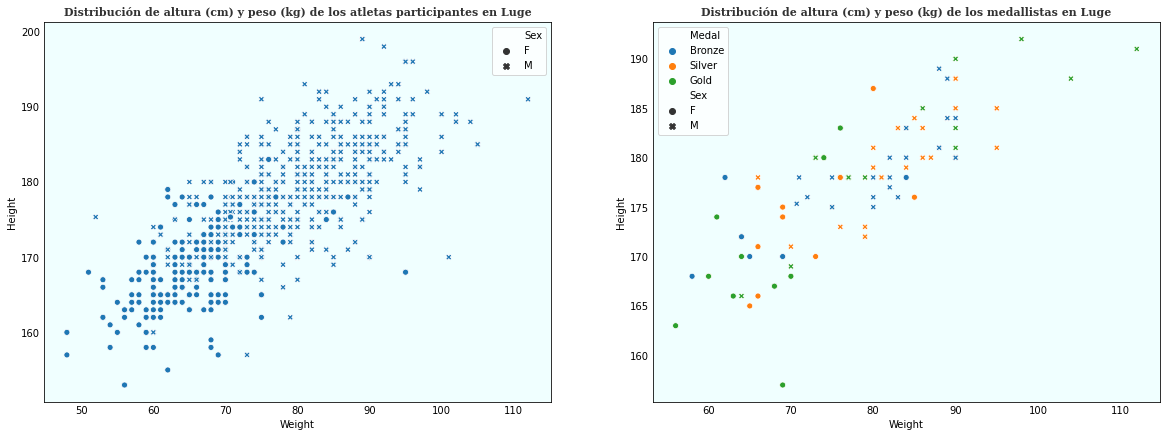

In [31]:
sport_hw('Luge', countMedal_winter, df_winter) #Colocar el deporte a graficar

Función que calcula la media, como diagrama de caja en función del tiempo, de los atletas y medallistas de los deportes olímpicos de invierno.

In [32]:
def sport_age(sport, countMedal_winter, df_winter):
    fig  = plt.figure(figsize=(20,10), facecolor='azure')
    gs1 = gridspec.GridSpec(2, 1, figure=fig)
    ax0 = fig.add_subplot(gs1[0])
    ax0.set_facecolor('azure')
    ax1 = fig.add_subplot(gs1[1])    
    ax1.set_facecolor('azure')
    #fig.tight_layout(h_pad=2)
    
    df_winter['Medal'].fillna('No Medal', inplace=True)

    ax0.tick_params(axis=u'both', which=u'both',length=0)
    ax0.set_title('Media de edad de los atletas participantes en ' + sport, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
    sns.boxplot('Year', 'Age', data=df_winter[df_winter['Sport'] == sport], ax=ax0)

    ax1.tick_params(axis=u'both', which=u'both',length=0)
    ax1.set_title('Media de edad de los medallistas en ' + sport, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')
    sns.boxplot('Year', 'Age', data=countMedal_winter[countMedal_winter['Sport'] == sport], ax=ax1)

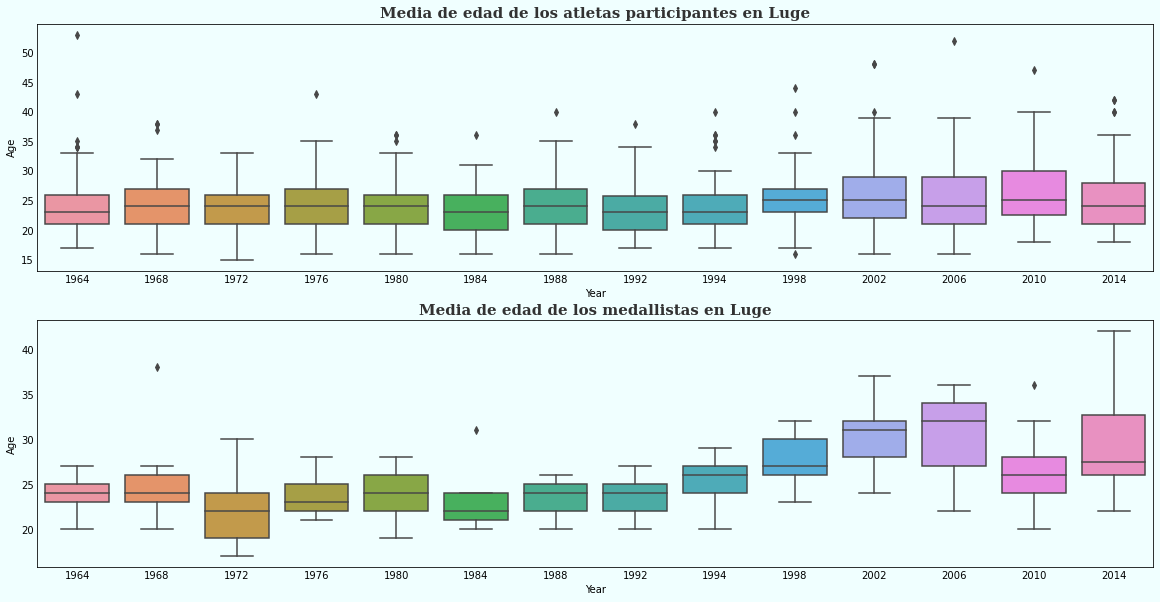

In [33]:
sport_age('Luge', countMedal_winter, df_winter) #Colocar el deporte a graficar

Función que tiene como salida lo siguiente, en función del deporte a analizar:
<ol>
    <li>oly: Lista de países con medalla olímpica en el deporte a analizar</li>
    <li>oly_part: Lista de países participantes en el deporte a analizar</li>
    <li>oly_eve: Lista con el eventos del deporte a analizar</li>
    <li>df_medal: dataframe de los deportistas con medalla</li>
    <li>df_párt: dataframe de los atletas participantes</li>
</ol>

In [34]:
def olympic_event(sport):
    oly = countMedal_winter.loc[countMedal_winter['Sport']==sport] #Lista de Países con Medallas
    oly_part = hola.loc[hola['Sport']==sport] # Lista de Países participantes
    oly_eve = oly_part['Event'].unique() #Eventos del deporte en cuestión
    
    df_medal = countMedal_winter.loc[countMedal_winter['Sport']==sport] #Dataframe medallistas
    df_part = hola.loc[hola['Sport']==sport] #Dataframe atletas participantes
    
    return oly, oly_part, oly_eve, df_medal, df_part

Lista de eventos simplificados.

In [35]:
country_event, ath_country_event, event, df_medal, df_part = olympic_event('Luge')  #Colocar el deporte a obtener la información
event

array(["Luge Women's Singles", "Luge Men's Singles",
       "Luge Mixed (Men)'s Doubles", 'Luge Mixed Team Relay'],
      dtype=object)

Listado de países con medalla en el deporte seleccionado en la función olympic_event.

In [36]:
country_event['Country'].unique()

array(['Russia', 'Germany', 'Italy', 'Austria',
       'United States of America', 'Latvia'], dtype=object)

Listado de países participantes en el deporte seleccionado en la función olympic_event.

In [37]:
ath_country_event['Country'].unique()

array(['Norway', 'Virgin Islands US', 'Kazakhstan', 'Germany', 'Canada',
       'Russia', 'Italy', 'Switzerland', 'Romania', 'Latvia', 'Japan',
       'Ukraine', 'Bulgaria', 'Tonga', 'France',
       'United States of America', 'Liechtenstein', 'Czech Republic',
       'Austria', 'Serbia', 'Bosnia and Herzegovina', 'Sweden',
       'Venezuela', 'Great Britain', 'Poland', 'Australia', 'Moldova',
       'Taiwan', 'Argentina', 'South Korea', 'Spain', 'Slovakia', 'India',
       'Individual Olympic Athletes', 'Brazil', 'Puerto Rico', 'Estonia',
       'Philippines', 'New Zealand', 'Bermuda', 'Greece', 'Slovenia',
       'Georgia'], dtype=object)

Contador con los países con mayor cantidad de atletas en el deporte seleccionado en la función olympic_event (top10).

In [38]:
ath_country_event['Country'].value_counts().head(10)

Germany                     182
United States of America    134
Italy                       123
Austria                     119
Russia                      105
Canada                       79
Latvia                       59
Poland                       49
Japan                        48
Czech Republic               42
Name: Country, dtype: int64

Función que grafica el % de medallas de Oro y el medallero del evento seleccionado en la función event_sports. 

Esta depende del deporte seleccionado en la función olympic_event

In [39]:
def events_sports(sport, event, df_sport):
    events = df_sport.loc[df_sport['Event']==event,]
    events.reset_index(drop=True, inplace=True)
    
    fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='azure')
    ax.set_facecolor('azure')
    ax.set_axisbelow(True)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_title('% Medallas de Oro en ' + sport + ': '+ event, fontsize=15,fontweight='bold',fontfamily='serif',color='#323232')

    winterNOC = events.groupby('Country').sum()[['Gold','Silver','Bronze']].reset_index() #.sort_values('Gold', ascending=False)
    winterNOC['Total'] = winterNOC['Gold'] + winterNOC['Silver'] + winterNOC['Bronze']
    winterNOC = winterNOC.sort_values('Gold', ascending=False)
    plt.pie(winterNOC['Gold'], colors = sns.color_palette('mako'), autopct='%1.1f%%',pctdistance=1.1)
    plt.legend(labels=winterNOC['Country'], loc='best', bbox_to_anchor=(0.9, 0., 0.75, 0.75), shadow=True) 
    plt.show()
    return winterNOC

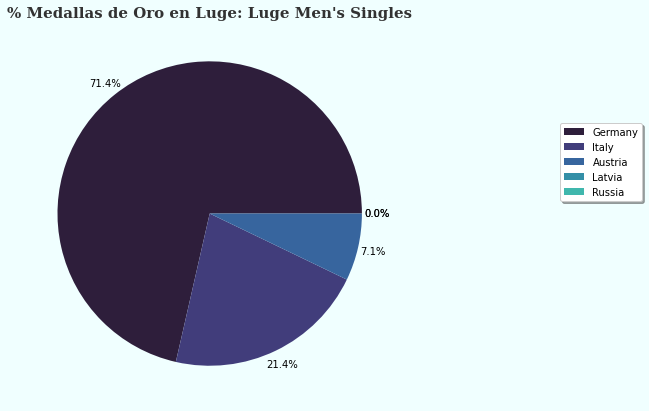

,Country,Gold,Silver,Bronze,Total
1,Germany,10,7,6,23
2,Italy,3,2,3,8
0,Austria,1,2,2,5
3,Latvia,0,0,1,1
4,Russia,0,3,2,5


In [40]:
top = events_sports('Luge','Luge Men\'s Singles', countMedal_winter) #Colocar el evento [Nombre exacto] y el deporte
top 

Grafica del rendimiento histórico del evento (o general) por país.

In [41]:
def medal_event(df_medal, country, sport, event):
    if event != 'Overall':
        temp_df_aux = df_medal[df_medal['Country'] == country]
        temp_df = temp_df_aux[temp_df_aux['Event'] == event]
    else:
        temp_df = df_medal[df_medal['Country'] == country]
    
    fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='azure')
    ax.set_facecolor('azure')
    
    color = ["#a97142", "lightgray", '#f0c05a']
    medals_list = ['Bronze', 'Silver', 'Gold']
    
    for i, medal in enumerate(medals_list):
        temp = temp_df.groupby(['Year'])['Gold','Silver','Bronze'].sum().cumsum(axis=1)[medal]
        ax.bar(temp.index, temp, color=color[i],width=1.5,ec='black')
    
    Xstart, Xend = ax.get_xlim()
    Ystart, Yend = ax.get_ylim()
    
    ax.text(Xstart+3,Yend+1, 'Medallas Olímpicas de ' + country +' en ' + sport + ': '+ event, fontsize=18,fontweight='bold',fontfamily='serif',color='#323232')

    ax.set_xlim(Xstart+2, Xend)
    ax.grid(which='both', axis='x', zorder=5, color='gray', linestyle=':', dashes=(1,5))
    ax.set_axisbelow(True)
    
    #Aplica SOLO si se quere analizar Rusia
    #plt.axvline(1988, color='r') #Ultimos Juegos URSS
    #plt.axvline(1992, color='g') #Equipo Unificado tras caída URSS
    #plt.axvline(1994, color='b') #Priemros Juegos Rusia
    
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    
    plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


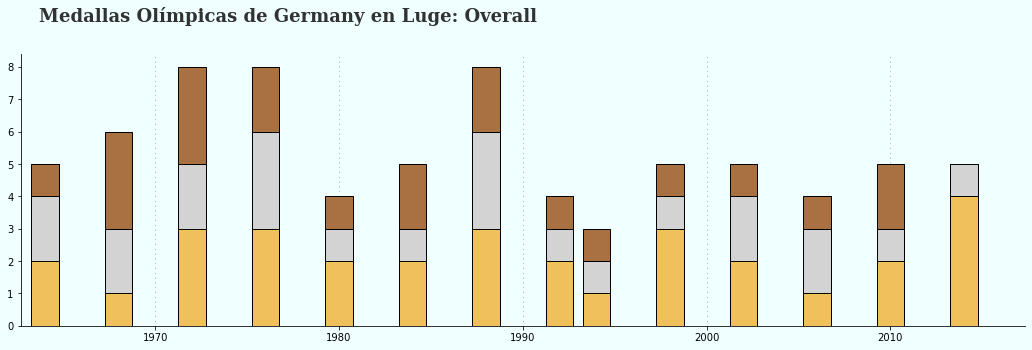

In [42]:
medal_event(df_medal, 'Germany', 'Luge', 'Overall') #Colocar país y evento: el evento puede ser uno en concreto o Overall (total). Depende del deporte selecionado previamente.